In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('yield.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.shape

(28242, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
df.isnull().sum()


Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:
#checking the duplicate values in the dataset 
df.duplicated().sum()

np.int64(2310)

In [9]:
#dropping the duplicated elements
df.drop_duplicates(inplace=True)


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


I found out that some values are numeric but in strings so I will not consider it and I will remove it in average_Rain_fall_mm_per_year column


In [12]:
df['average_rain_fall_mm_per_year']

0        1485.0
1        1485.0
2        1485.0
3        1485.0
4        1485.0
          ...  
28237     657.0
28238     657.0
28239     657.0
28240     657.0
28241     657.0
Name: average_rain_fall_mm_per_year, Length: 25932, dtype: float64

In [13]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True



In [14]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

In [15]:

df = df.drop(to_drop)


In [16]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


it is not necessary to this because in info option I already see it is float64 

if there is int to convert it to float64 we use 


In [17]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

1) Line Plot: Crop Yield Over Years(Yield vs Items)
Purpose: Understand trends in productivity over time for each crop or region.

Example Insight: Is maize yield increasing in India from 1990–2020?

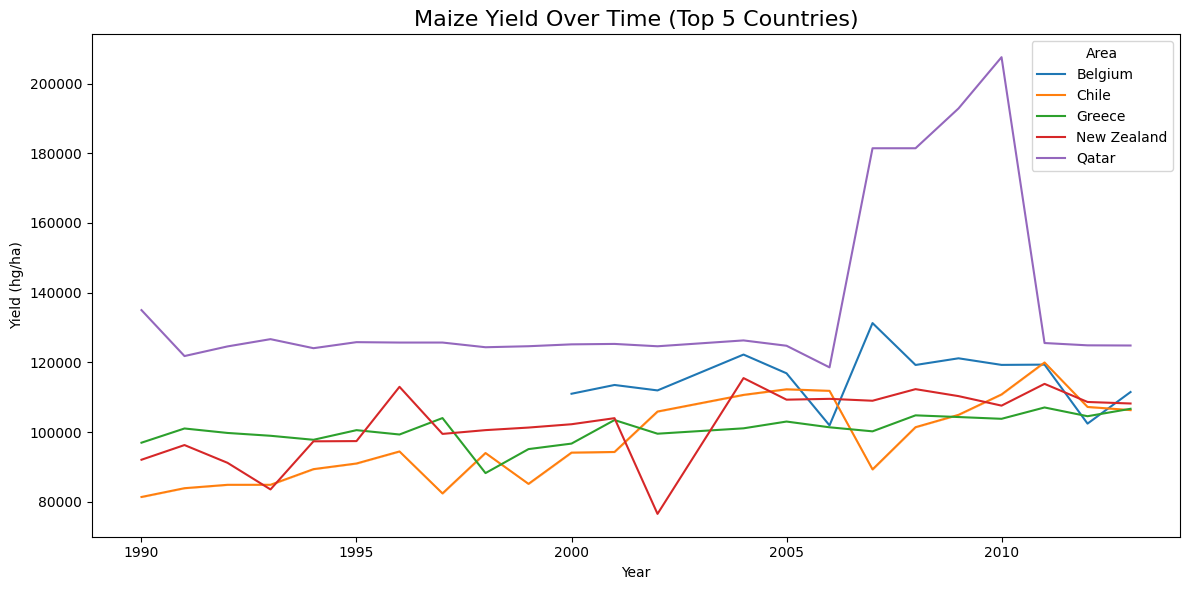

In [18]:
# Top 5 countries with highest average maize yield
top_countries = df[df['Item'] == 'Maize'].groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).head(5).index

# Filter data
filtered_df = df[(df['Item'] == 'Maize') & (df['Area'].isin(top_countries))]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='Year', y='hg/ha_yield', hue='Area')
plt.title("Maize Yield Over Time (Top 5 Countries)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Yield (hg/ha)")
plt.tight_layout()
plt.show()


C:\Users\Yashraj Kumar\AppData\Local\Temp\ipykernel_15120\1259869267.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


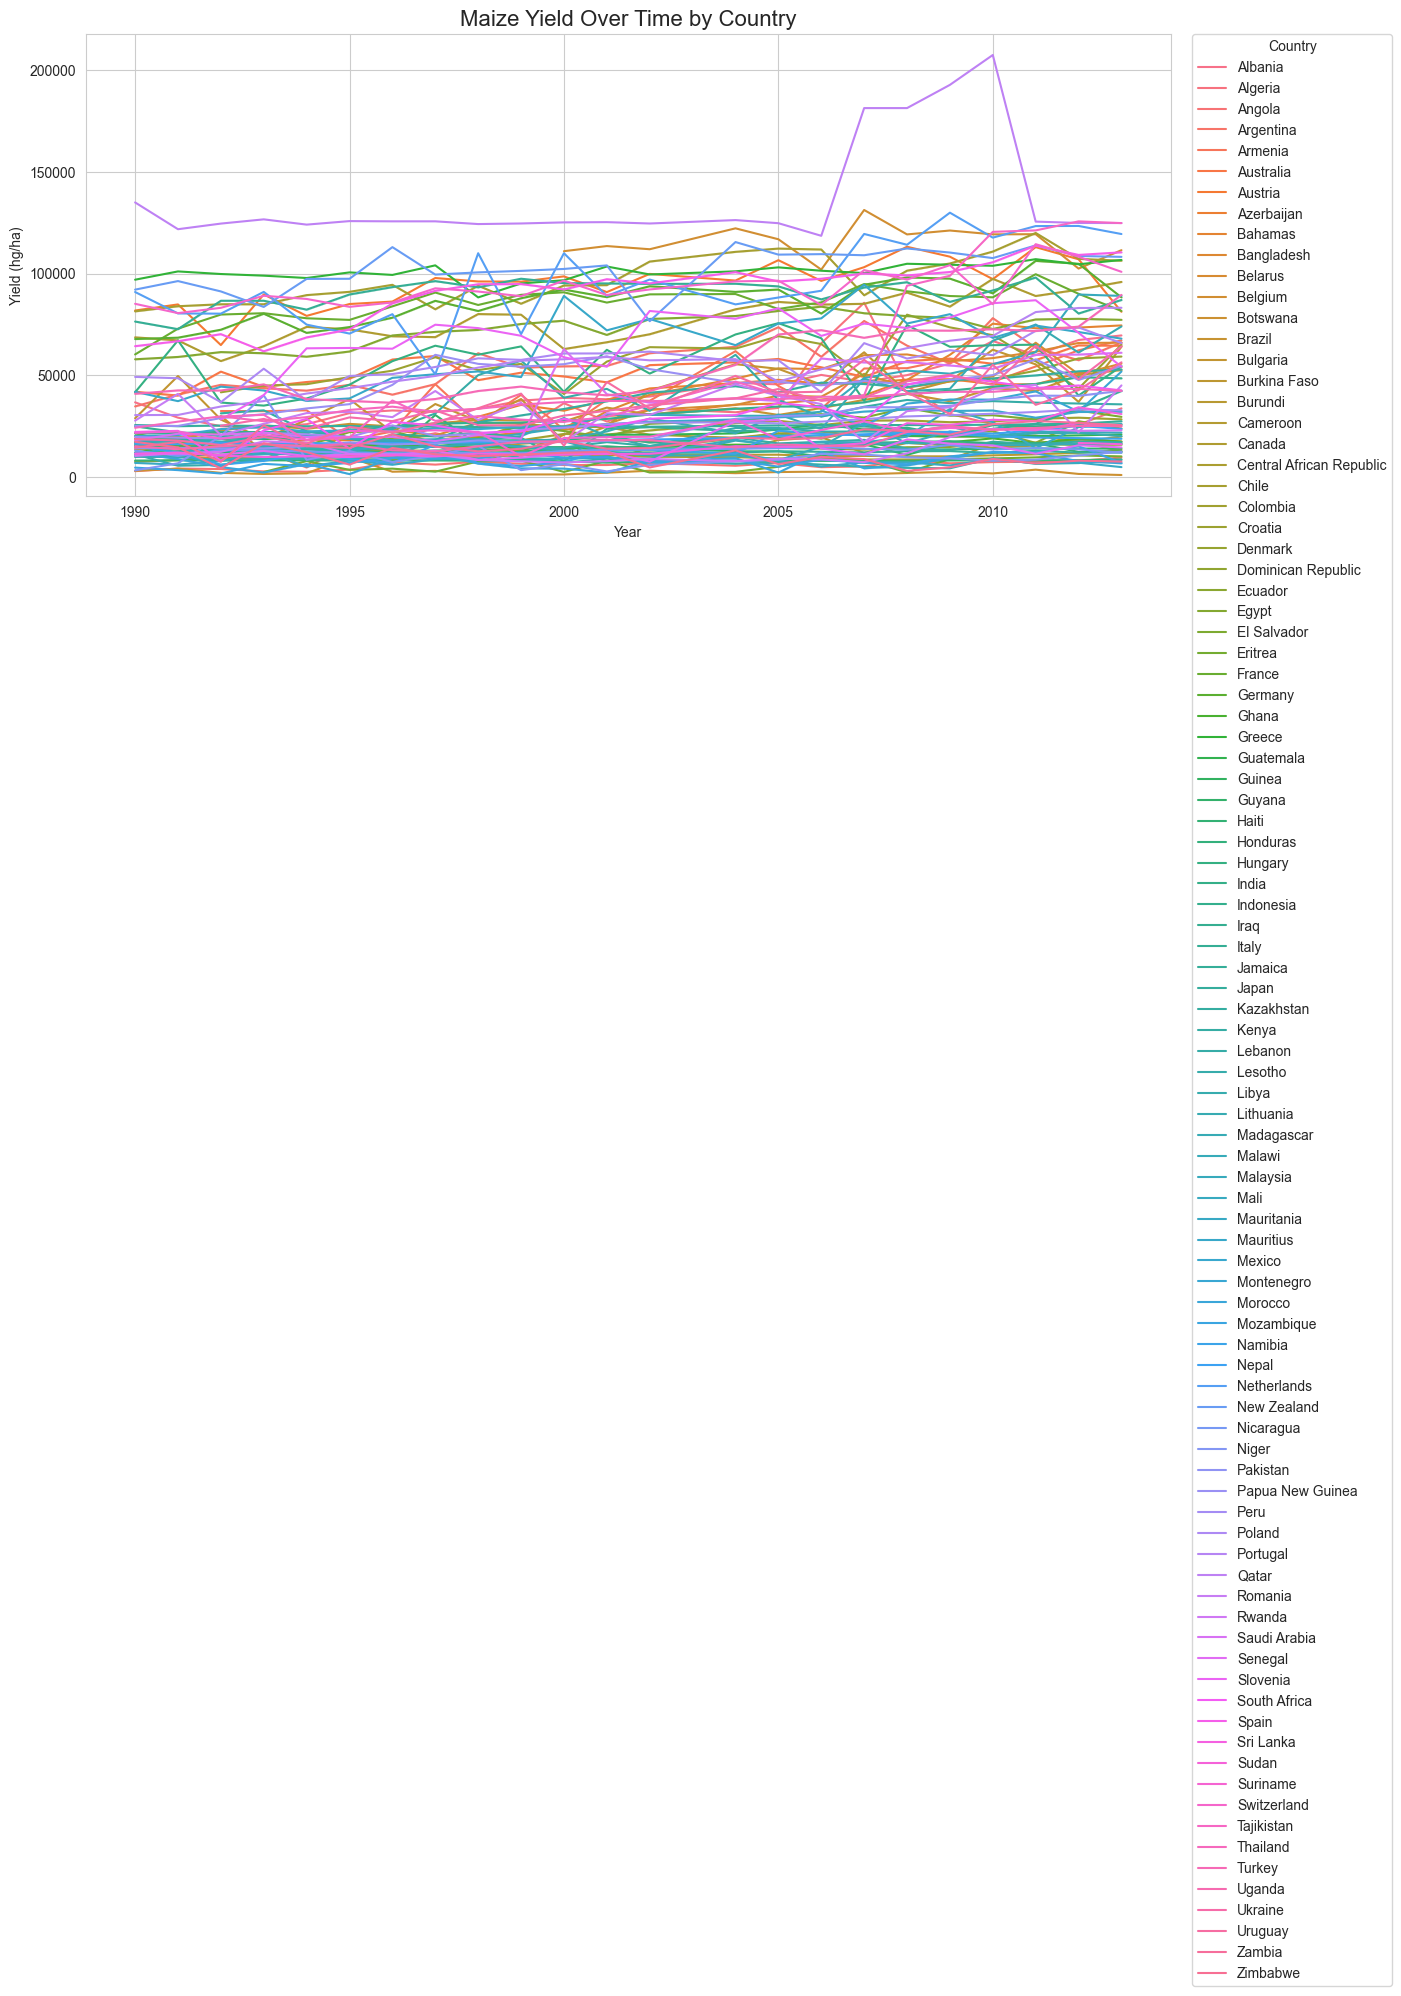

In [19]:
#or
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Line plot
sns.lineplot(data=df[df['Item'] == 'Maize'], x='Year', y='hg/ha_yield', hue='Area')

# Labels and legend
plt.title("Maize Yield Over Time by Country", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Yield (hg/ha)")

# Move legend outside
plt.legend(title='Country', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


2. 🌡️ Correlation Heatmap
Purpose: See how numeric features like rainfall, temperature, and pesticides relate to yield.

Example Insight: Does rainfall have a strong positive correlation with yield?

Text(0.5, 1.0, 'Correlation Heatmap')

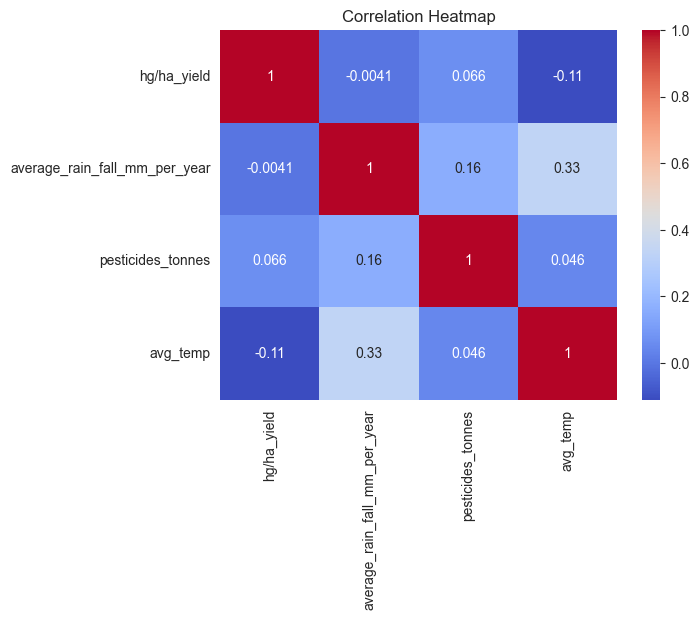

In [20]:
sns.heatmap(df[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].corr(), 
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


3. 🧪 Scatter Plot: Yield vs Rainfall
Purpose: Visualize the relationship between rainfall and yield.

Example Insight: Do crops yield more when rainfall increases?

Text(0.5, 1.0, 'Yield vs Rainfall by Crop')

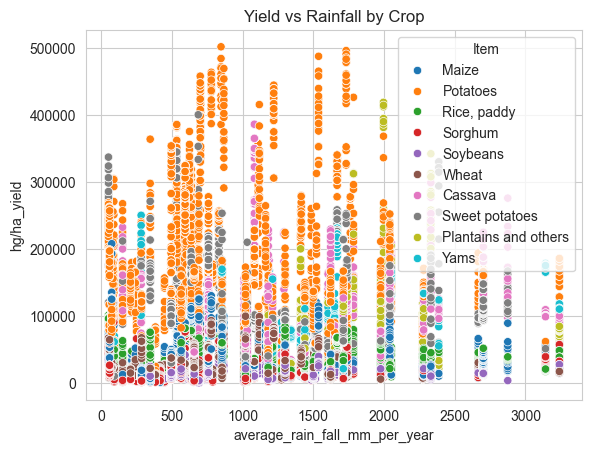

In [21]:
sns.scatterplot(data=df, x='average_rain_fall_mm_per_year', y='hg/ha_yield', hue='Item')
plt.title("Yield vs Rainfall by Crop")


4. 📊 Bar Plot: Average Yield by Country
Purpose: Compare overall productivity across countries.

Example Insight: Which countries have the highest average yield?

<Axes: title={'center': 'Top 10 Countries by Average Yield'}, xlabel='Area'>

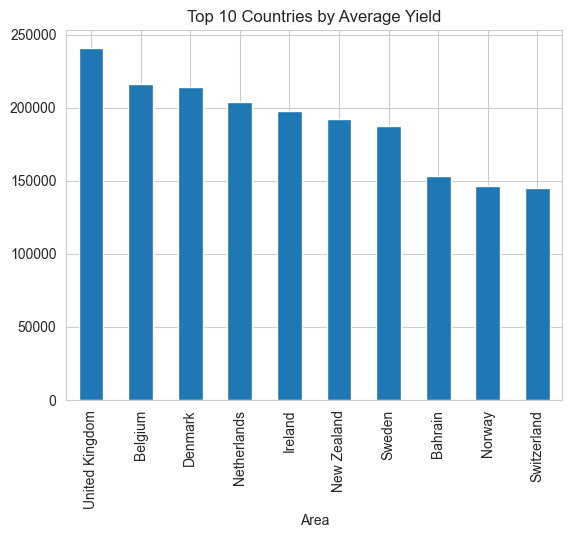

In [22]:
top_countries = df.groupby('Area')['hg/ha_yield'].mean().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', title='Top 10 Countries by Average Yield')


5. 📦 Box Plot: Yield Distribution by Crop Type
Purpose: Show the spread, median, and outliers in yield per crop.

Example Insight: Which crop has the most variable yield?

Text(0.5, 1.0, 'Yield Distribution by Crop Type')

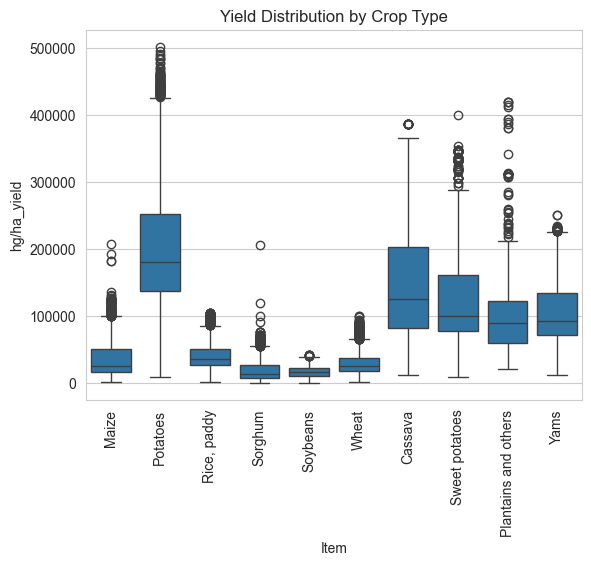

In [23]:
sns.boxplot(data=df, x='Item', y='hg/ha_yield')
plt.xticks(rotation=90)
plt.title("Yield Distribution by Crop Type")


Rearranging the columns becaue yield is in middle

In [24]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]

In [25]:
df

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.00,16.37,Albania,Maize,36613
1,1990,1485.0,121.00,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.00,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.00,16.37,Albania,Soybeans,7000
...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy",22581
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum,3066
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans,13142
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes,22222


In [26]:
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [27]:
X

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item
0,1990,1485.0,121.00,16.37,Albania,Maize
1,1990,1485.0,121.00,16.37,Albania,Potatoes
2,1990,1485.0,121.00,16.37,Albania,"Rice, paddy"
3,1990,1485.0,121.00,16.37,Albania,Sorghum
4,1990,1485.0,121.00,16.37,Albania,Soybeans
...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,Zimbabwe,"Rice, paddy"
28238,2013,657.0,2550.07,19.76,Zimbabwe,Sorghum
28239,2013,657.0,2550.07,19.76,Zimbabwe,Soybeans
28240,2013,657.0,2550.07,19.76,Zimbabwe,Sweet potatoes


In [28]:
y

0        36613
1        66667
2        23333
3        12500
4         7000
         ...  
28237    22581
28238     3066
28239    13142
28240    22222
28241    22888
Name: hg/ha_yield, Length: 25932, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Convert Categorical Columns to Numeric (One-Hot Encoding)

Use pd.get_dummies() before scaling:

In [30]:
# 🔄 Concatenate train and test to avoid mismatch during one-hot encoding
combined = pd.concat([X_train, X_test])

# 🎯 Apply one-hot encoding to categorical columns
combined_encoded = pd.get_dummies(combined, columns=['Area', 'Item'], drop_first=True)

# 🔀 Split encoded data back into train and test
X_train_encoded = combined_encoded.iloc[:len(X_train), :]
X_test_encoded = combined_encoded.iloc[len(X_train):, :]

# 📌 Save column structure after encoding for later prediction alignment
encoder_columns = X_train_encoded.columns.tolist()


In [31]:
X_test_encoded

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,...,Area_Zimbabwe,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
345,2010,1010.0,40.00,24.44,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26405,2006,1622.0,41220.00,27.92,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
27032,2010,593.0,38554.69,13.80,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
24736,1996,495.0,19508.00,15.23,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6053,2010,537.0,61050.00,9.47,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,2006,758.0,50891.95,20.30,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6994,2004,1113.0,2174.00,10.06,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
27921,1995,1020.0,716.00,21.86,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
13777,2009,1083.0,28707.01,27.82,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [32]:
#standarized it
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


Train the model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("R2 Score:", r2_score(y_test, lr_pred))


Linear Regression
MAE: 29920.741935751757
R2 Score: 0.7486562040956107


In [34]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

print("\nRidge Regression")
print("MAE:", mean_absolute_error(y_test, ridge_pred))
print("R2 Score:", r2_score(y_test, ridge_pred))



Ridge Regression
MAE: 29918.98804400473
R2 Score: 0.7486563183486603


In [35]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)

print("\nLasso Regression")
print("MAE:", mean_absolute_error(y_test, lasso_pred))
print("R2 Score:", r2_score(y_test, lasso_pred))



Lasso Regression
MAE: 29918.683196949456
R2 Score: 0.7486534271395924


C:\Users\Yashraj Kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.173e+12, tolerance: 1.482e+10
  model = cd_fast.enet_coordinate_descent(


In [36]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

print("\nDecision Tree")
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("R2 Score:", r2_score(y_test, dt_pred))



Decision Tree
MAE: 4127.543859649123
R2 Score: 0.9768022383364062


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Initialize with reduced complexity
rf_model = RandomForestRegressor(
    n_estimators=50,        # reduce number of trees
    max_depth=10,           # limit depth of each tree
    min_samples_split=5,    # optional: fewer splits = smaller model
    random_state=42
)

# 2. Train
rf_model.fit(X_train_encoded, y_train)

# 3. Predict
rf_pred = rf_model.predict(X_test_encoded)

# 4. Evaluate
print("Random Forest Evaluation:")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("R² Score:", r2_score(y_test, rf_pred))


Random Forest Evaluation:
MAE: 13797.22485235131
R² Score: 0.9198942852552562


so after running all of it the the randomforest has the lowest MAE error and the R2 square is also good so it is a good model


In [38]:
# #if i run all code in one like a pipeline 

# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np
# import pandas as pd

# # Define models
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge Regression': Ridge(),
#     'Lasso Regression': Lasso(),
#     'Decision Tree': DecisionTreeRegressor(random_state=42),
#     'Random Forest': RandomForestRegressor(random_state=42)
# }

# # Store results
# results = []

# # Loop through models
# for name, model in models.items():
#     model.fit(X_train_encoded, y_train)
#     y_pred = model.predict(X_test_encoded)
    
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test, y_pred)
    
#     results.append({
#         'Model': name,
#         'MAE': mae,
#         'RMSE': rmse,
#         'R² Score': r2
#     })

# # Convert to DataFrame for display
# results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
# print(results_df)


Predictive System


In [39]:
# 👇 This part assumes rf_model and scaler are already defined

def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create DataFrame
    input_df = pd.DataFrame([{
        'Year': Year,
        'average_rain_fall_mm_per_year': average_rain_fall_mm_per_year,
        'pesticides_tonnes': pesticides_tonnes,
        'avg_temp': avg_temp,
        'Area': Area,
        'Item': Item
    }])
    
    # One-hot encode (same as training)
    input_encoded = pd.get_dummies(input_df)

    # Reindex to match training columns
    input_encoded = input_encoded.reindex(columns=encoder_columns, fill_value=0)

    # Standardize using fitted scaler
    input_scaled = scaler.transform(input_encoded)

    # Predict
    prediction = rf_model.predict(input_scaled)
    return prediction[0]


Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

C:\Users\Yashraj Kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [40]:
result

np.float64(48236.02325160769)

In [41]:
import pickle

# Save the trained model
pickle.dump(rf_model, open('rf_model.pkl', 'wb'))

# Save the fitted StandardScaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

# Save the encoder_columns list
pickle.dump(encoder_columns, open('encoder_columns.pkl', 'wb'))


In [42]:
# 👇 This part assumes rf_model and scaler are already defined

def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create DataFrame
    input_df = pd.DataFrame([{
        'Year': Year,
        'average_rain_fall_mm_per_year': average_rain_fall_mm_per_year,
        'pesticides_tonnes': pesticides_tonnes,
        'avg_temp': avg_temp,
        'Area': Area,
        'Item': Item
    }])
    
    # One-hot encode (same as training)
    input_encoded = pd.get_dummies(input_df)

    # Reindex to match training columns
    input_encoded = input_encoded.reindex(columns=encoder_columns, fill_value=0)

    # Standardize using fitted scaler
    input_scaled = scaler.transform(input_encoded)

    # Predict
    prediction = rf_model.predict(input_scaled)
    return prediction[0]


Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

C:\Users\Yashraj Kumar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [43]:
import sklearn
print(sklearn.__version__)

1.6.1
